# Projeto 2 - Aprendizado supervisionado - 1s2021
## Desenvolvido por:
## Felipe Arruda (RA: 196862)
- Responsável por desenvolver a tarefa de classificação
## Leonardo Koike (RA: 201332)
- Responsável por desenvolver a tarefa de regressão


# Parte 1 - Tarefa de regressão

## Implementação dos métodos utilizados para essa tarefa
Para cada método criado, existe uma documentação explicando sua função e comentários ao longo do código para compreender seu desenvolvimento.

### Pontos importantes dessa seção:
 - Implementação da regressão linear e polinomial
 - Implementação do gradiente descente
 - Implementação da apresentação do modelo em gráfico 3D

In [1]:
# Biblioteca utilizadas na parte da regressão
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_linear(data_ref: np.ndarray, data_in: np.ndarray, alfa: float, n_epoca: int) -> np.ndarray:
    """
    Aqui utilizamos a estratégia de Batch do gradiente descendente, ou seja, utilizamos todos os exemplos fornecidos como o tamanho de batch, por isso cada época será uma iteração do loop de treinamento.
    Falando um pouco sobre o algoritmo do gradiente descendente, as derivadas são calculadas e armazenadas nas variáveis der_, que para esse caso linear é basicamente a média do erro. Abaixo temos a formula da hipótese para realizar a regressão linear:
    Hipótese:
        data_hip = teta0 + teta1 * data_in
    
    Derivadas:
        der0 = np.sum(hip_x - x)/x.size
        der1 = np.sum((hip.x - x) * y)/x.size

    Parâmetros:
        data_ref(np.ndarray): valores de referência da coordenada da bola
        data_in(np.ndarray): valores de entrada (variável independente da equação)
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem

    Retorna:
        Um array com os valores dos coeficientes da equação calculada.
    """
    # inicialização de teta0 e teta1
    teta0 = 0.
    teta1 = 0.
    flag = True
    # iteração de aprendizagem
    for _ in range(n_epoca):
        # calculo dos dados de hipótese
        data_hip = teta0 + teta1 * data_in
        # equações derivadas
        der0 = np.sum((data_hip - data_ref))/data_in.size
        der1 = np.sum((data_hip - data_ref)*data_in)/data_in.size
        # atualização dos coeficientes de acordo com a taxa de aprendizagem
        teta0 = teta0 - alfa* der0
        teta1 = teta1 - alfa* der1
    return np.array([teta0, teta1])

In [3]:
def linear_regression(kick: np.ndarray, alfa: float = 0.1, n_epoca: int = 10000) -> np.ndarray:
    """
    Esse método é responsável por fazer o cálculo dos valores de teta(z) e teta(x) da regressão linear utilizando o gradiente descendente.
    Aqui farei o uso da seguinte hipótese das variáveis x e z (que são duas das coordenadas do centro da bola) em função da variável y (a ultima coordenada da bola):
        hx_teta(t) = tetax0 + tetax1 * y
        hz_teta(t) = tetaz0 + tetaz1 * y

    Parâmetros:
        kick(np.ndarray): dados de referência das coordenadas da bola
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
    
    Retorna:
        Um array com os coeficientes da equação.
    """
    # separa as variaveis da coordenada do chute
    x = kick[:,0]
    y = kick[:,1]
    z = kick[:,2]
    # crio um array para armazenar os coeficientes da regressão
    teta = np.ndarray(shape=(2,2),dtype=np.float128)
    # utilizo o Gradiente Descente da regressão linear da hipótese de x.
    teta[0,:] = gradient_descent_linear(data_ref=x,data_in=y,alfa=alfa,n_epoca=n_epoca)
    # utilizo o Gradiente Descenete da regressão linear da hipótese de z.
    teta[1,:] = gradient_descent_linear(data_ref=z,data_in=y,alfa=alfa,n_epoca=n_epoca)
    # calculo da trajetoria do chute seguindo a regressão
    array_y = np.linspace(0,2.1,1000)
    array_x = func(array_y,teta[0,:],"x")
    array_z = func(array_y,teta[1,:],"z")
    # plot 3D com os dados coletados do chute e a trajetória de previsão
    plot_3d(kick=kick,array_x=array_x,array_y=array_y,array_z=array_z)

    return teta

In [4]:
def gradient_descent_polynomial(data_ref: np.ndarray, data_in: np.ndarray, alfa: float, n_epoca: int, n_var: int) -> np.ndarray:
    """
    Semelhante ao gradiente descente linear, as derivadas são calculadas e armazenadas no array der. Abaixo temos a formula da hipótese para realizar a regressão polinomial:
    Hipótese:
        data_hip = teta0 + teta1 * data_in + teta2 * data_in**2 ... , dependendo do grau de complexidade da equação

    Derivadas:
        der[0] = grau_complexidade * np.sum(hip_x - x)/x.size
        der[1] = grau_complexidade * np.sum((hip.x - x) * y)/x.size
        der[2] = grau_complexidade * np.sum((hip.x - x) * y**2)/x.size
        ...
    
    Parâmetros:
        data_ref(np.ndarray): valores de referência da coordenada da bola
        data_in(np.ndarray): valores de entrada (variável independente da equação)
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
        n_var(int): grau de complexidade da variável

    Retorna:
        Um array com os coeficientes da equação.
    """
    teta = np.zeros(shape=n_var+1, dtype=np.float128)
    der = np.zeros(shape=n_var+1, dtype=np.float128)
    for _ in range(n_epoca):
        data_hip = np.zeros(shape=data_ref.size)
        for index, t in enumerate(teta):
            data_hip += t * data_in ** (index)
        for index in range(der.size):
            if index == 0:
                der[index] = n_var * np.sum((data_hip-data_ref))/data_in.size
            else:
                der[index] = n_var * np.sum((data_hip-data_ref)*data_in**(index))/data_in.size
        for index in range(der.size):
            teta[index] = teta[index] - alfa * der[index]
    return teta

In [5]:
def polynomial_regression(kick: np.ndarray, n_x: int = 1, n_z: int = 2,  alfa: float = 0.1, n_epoca: int = 10000) -> Tuple:
    """
    Esse método é responsável por fazer o cálculo dos valores de teta(z) e teta(x) da regressão polinomial utilizando também o cálculo do gradiente descendente.
    Aqui farei o uso da seguinte hipótese das variáveis x e z (que são duas das coordenadas do centro da bola) em função da variável y (a ultima coordenada da bola):
        hx_teta(t) = tetax0 + tetax1 * y**1 + tetax2 * y**2... , dependendo do grau de complexidade da equação 
        hz_teta(t) = tetaz0 + tetaz1 * y**1 + tetaz2 * y**2... , dependendo do grau de complexidade da equação

    Parâmetros:
        kick(np.ndarray): dados de referência das coordenadas da bola
        n_x(int): grau de complexidade de x
        n_z(int): grau de complexidade de z
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem

    Retorna:
        Uma tupla com as coeficientes da regressão em x e z.
    """
    # separa as variaveis da coordenada do chute
    x = kick[:,0]
    y = kick[:,1]
    z = kick[:,2]
    # array com os valores dos coeficientes da regressão de x
    tetax = gradient_descent_polynomial(data_ref=x,data_in=y,alfa=alfa,n_epoca=n_epoca,n_var=n_x)
    # array com os valores dos coeficientes da regressão de z
    tetaz = gradient_descent_polynomial(data_ref=z,data_in=y,alfa=alfa,n_epoca=n_epoca,n_var=n_z)
    # calculo da trajetoria do chute seguindo os valores de teta encontrados na regressão
    array_y = np.linspace(-0,2.1,1000)
    array_x = func(array_y,tetax,"x")
    array_z = func(array_y,tetaz,"z")
    
    # plot 3D com os dados coletados do chute e a trajetória de previsão
    plot_3d(kick=kick,array_x=array_x,array_y=array_y,array_z=array_z)

    return tetax, tetaz

In [6]:
def plot_3d(kick: np.ndarray, array_x: np.ndarray, array_y: np.ndarray, array_z: np.ndarray) -> None:
    """
    Realiza o plot do gráfico 3D dos pontos da bola e a trajetória prevista para ela de acordo com a regressão, podendo ser linear ou polinomial.

    Parâmetros:
        kick(np.ndarray): dados da coordenada da bola capturados
        array_x(np.ndarray): dados da coordenada x da trajetória
        array_y(np.ndarray): dados da coordenada y da trajetória
        array_z(np.ndarray): dados da coordenada z da trajetória
    """
    # array para fazer o plot do campo de futebol
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2.1,2))
    Z =  np.zeros(X.shape)

    fig = plt.figure(figsize=plt.figaspect(0.3))
    # adiciona um sub plot de um angulo do chute
    ax = fig.add_subplot(1,3,1,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 0)

    # adiciona um sub plot de outro angulo do chute
    ax = fig.add_subplot(1,3,2,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 75)

    # adiciona um sub plot de outro angulo do chute
    ax = fig.add_subplot(1,3,3,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 90)

In [7]:
def func(data_in: np.ndarray, teta: np.ndarray, str: str) -> np.ndarray:
    """
    Aplica a equação encontrada na regressão, gerando a coordenada em um eixo da trajetória.

    Parâmteros:
        data_in(np.ndarray): array com a variável independente da equação
        teta(np.ndarray): array com os coefientes da equação encontrados na regressão
        str(str): string com qual a variável sendo calculada
    """
    # array de resposta
    res = np.zeros(shape=data_in.size)
    # string que apresenta a equação da função
    string = f"{str} = "
    # loop para formular a equação e incrementar a coordenada
    for i in range(teta.size):
        if i == 0:
            string += f"{teta[i]:.2f} + "
        elif i == teta.size -1:
            string += f"{teta[i]:.2f}*y^{i}"
        else:
            string += f"{teta[i]:.2f}*y^{i} + "
        res += teta[i] * data_in**(i)
    print(string)
    return res

## Execução
- Treinamento da regressão linear e polinomial com os datasets fornecidos (kick1 e kick2).
- Aplicação de diferentes valores de taxa de aprendizado e grau de complexidade.

In [8]:
# carrega os datasets com as coordenadas dos chutes
kick1 = np.loadtxt("kick1.dat")
kick2 = np.loadtxt("kick2.dat")

### Chute 1

x = -2.29 + 0.99*y^1
z = 0.10 + 0.01*y^1


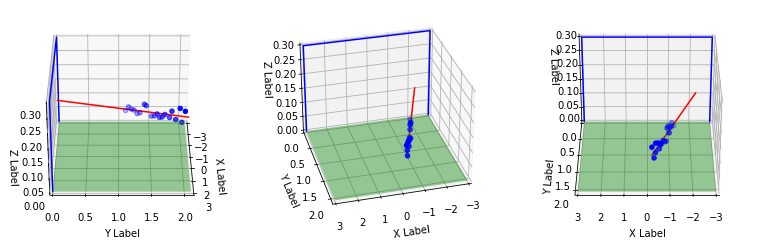

In [9]:
# regressão linear do kick1
res1 = linear_regression(kick=kick1,alfa=0.1,n_epoca=10000)

/home/leokoike/.pyenv/versions/3.8.5/envs/mc886-venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-2-839f79bd7a32>:34: RuntimeWarning: invalid value encountered in double_scalars
  teta1 = teta1 - alfa* der1


x = nan + nan*y^1
z = nan + nan*y^1


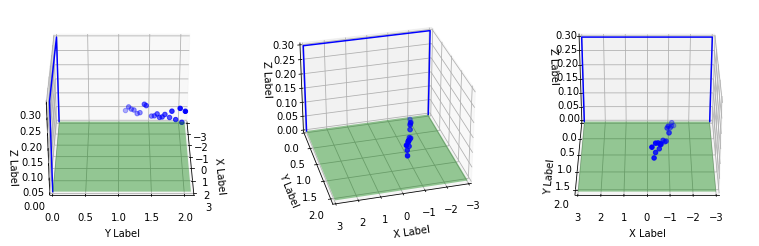

In [10]:
# regressão linear do kick1 com uma alta taxa de aprendizado
res2 = linear_regression(kick=kick1,alfa=0.7,n_epoca=100000)
# como resultado, para uma taxa de aprendizado alto, 
# houve um erro pois os valores se tornaram muito grande (em questão de precisão) para serem armazenados em um float. Podemos considerar que ele não conseguiu convergir para um valor. 

x = -0.63 + -0.04*y^1
z = 0.05 + 0.04*y^1


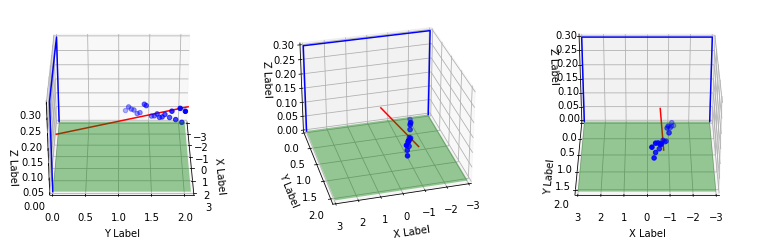

In [11]:
# regressão linear do kick1 com uma baixa taxa de aprendizado
res3 = linear_regression(kick=kick1,alfa=0.0001,n_epoca=100000)
# como resultado, para uma taxa de aprendizado baixo,
# a quantidade de épocas para o treinamento não foi o suficiente para definir uma trajetória correta visualmente com o dataset.

-------------------------------alfa = 0.08-----------------------------------
x = -2.29 + 0.99*y^1
z = 0.21 + -0.13*y^1 + 0.04*y^2
-------------------------------alfa = 0.02-----------------------------------
x = -2.29 + 0.99*y^1
z = 0.17 + -0.08*y^1 + 0.03*y^2


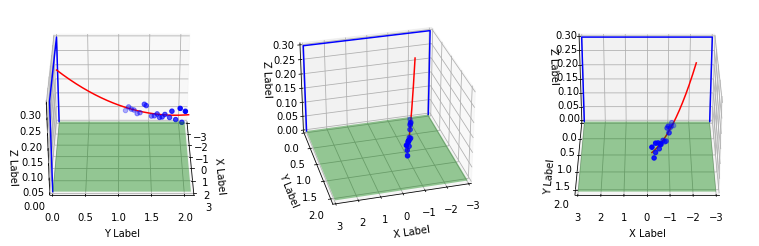

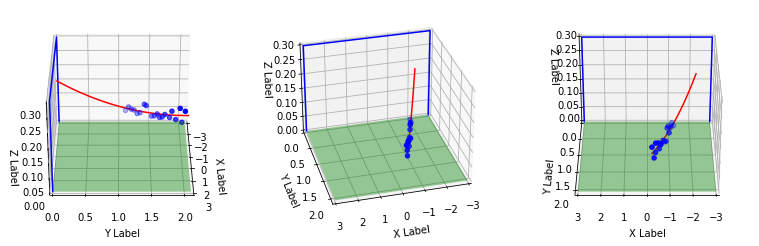

In [12]:
# regressão polinomial do kick1 considerando o eixo x como linear e o eixo z como quadrático.
# Além disso, apresentamos diferentes taxas de aprendizado para verificar seu comportamento.
print("-------------------------------alfa = 0.08-----------------------------------")
res4 = polynomial_regression(kick=kick1,n_x=1,n_z=2,alfa=0.08,n_epoca=100000)
print("-------------------------------alfa = 0.02-----------------------------------")
res5 = polynomial_regression(kick=kick1,n_x=1,n_z=2,alfa=0.02,n_epoca=100000)
# com a diferença de taxa de aprendizado, podemos ver que para valores mais altos a curva ficou mais acentuada.

------------------------------grau_x = 2 e grau_z = 1-----------------------------------
x = -1.42 + -0.14*y^1 + 0.36*y^2
z = 0.10 + 0.01*y^1
------------------------------grau_x = 3 e grau_z = 1-----------------------------------
x = -1.48 + -0.31*y^1 + 0.65*y^2 + -0.10*y^3
z = 0.10 + 0.01*y^1


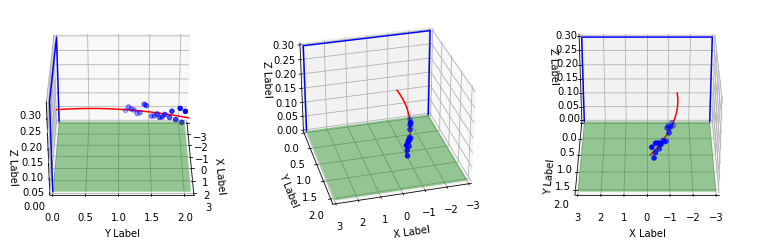

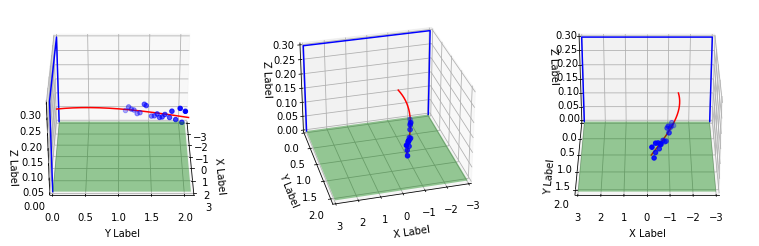

In [13]:
# regressão polinomial do kick1 para diferentes graus de complexidade para x
print("------------------------------grau_x = 2 e grau_z = 1-----------------------------------")
res4 = polynomial_regression(kick=kick1,n_x=2,n_z=1,alfa=0.01,n_epoca=100000)
print("------------------------------grau_x = 3 e grau_z = 1-----------------------------------")
res5 = polynomial_regression(kick=kick1,n_x=3,n_z=1,alfa=0.01,n_epoca=100000)
# Como resultado, uma curva em x surge. Com a variação do grau da equação, podemos ver uma leve diferença na curva, se tornando mais acentuada.

------------------------------grau_x = 1 e grau_z = 3-----------------------------------
x = -2.29 + 0.99*y^1
z = 0.13 + 0.04*y^1 + -0.07*y^2 + 0.03*y^3
------------------------------grau_x = 1 e grau_z = 4-----------------------------------
x = -2.27 + 0.98*y^1
z = 0.09 + 0.06*y^1 + 0.01*y^2 + -0.05*y^3 + 0.02*y^4


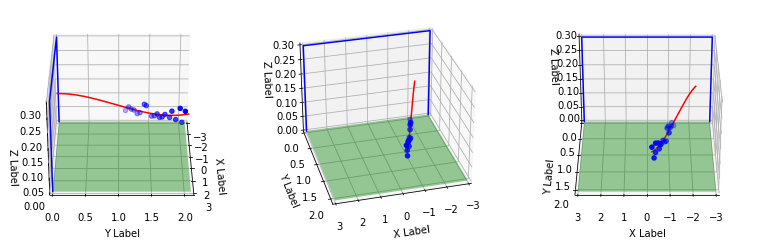

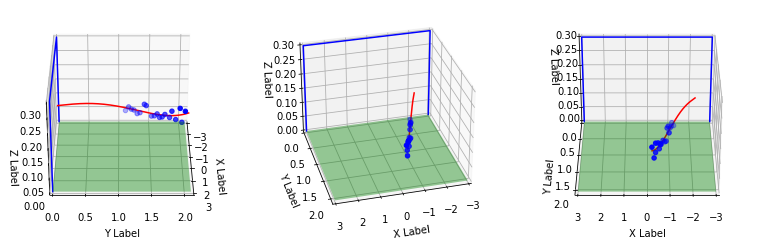

In [14]:
# regressão polinomial do kick1 para diferentes graus de complexidade para z
print("------------------------------grau_x = 1 e grau_z = 3-----------------------------------")
res6 = polynomial_regression(kick=kick1,n_x=1,n_z=3,alfa=0.01,n_epoca=100000)
print("------------------------------grau_x = 1 e grau_z = 4-----------------------------------")
res7 = polynomial_regression(kick=kick1,n_x=1,n_z=4,alfa=0.002,n_epoca=100000)
# Como resultado, podemos ver uma trajetória ondulada sobre o plano yz.

### Chute 2

x = -1.14 + 0.49*y^1
z = 0.47 + -0.15*y^1


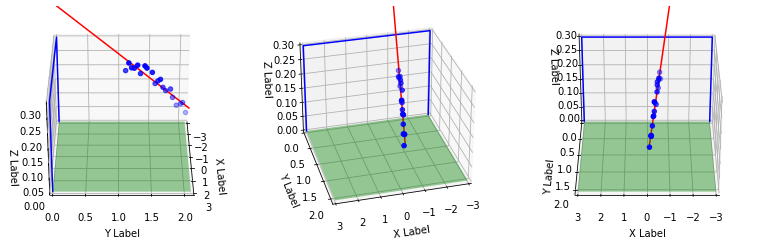

In [15]:
# regressão linear para o kick2
res_1 = linear_regression(kick=kick2,alfa=0.01,n_epoca=100000)
# Como resultado, vemos que uma equação linear para o kick2 mostra um chute fora do escopo utilizado no projeto.

-------------------------------alfa = 0.002-----------------------------------
x = -1.13 + 0.49*y^1
z = 0.22 + 0.18*y^1 + -0.11*y^2
-------------------------------alfa = 0.005-----------------------------------
x = -1.14 + 0.49*y^1
z = 0.20 + 0.21*y^1 + -0.12*y^2
-------------------------------alfa = 0.008-----------------------------------
x = -1.14 + 0.49*y^1
z = 0.17 + 0.24*y^1 + -0.12*y^2


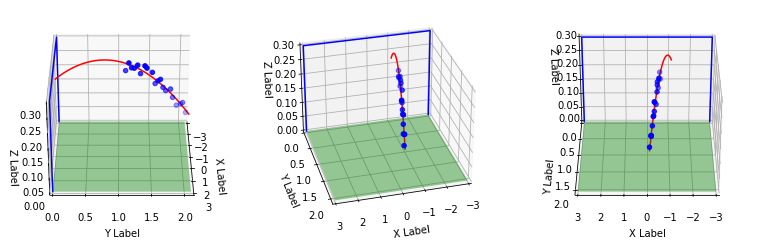

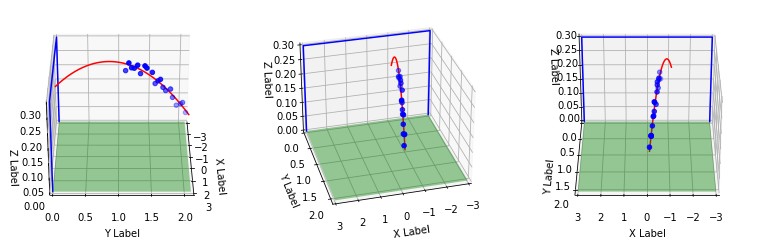

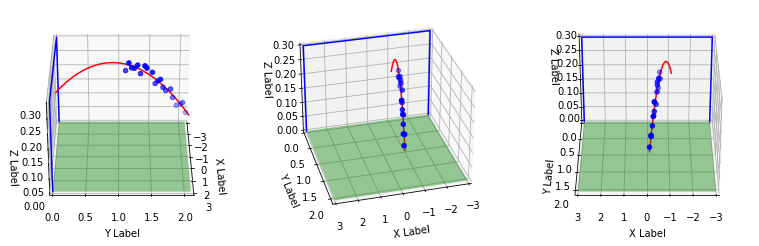

In [16]:
# regressão polinomial para kick2, variando o valor de alfa
print("-------------------------------alfa = 0.002-----------------------------------")
res_2 = polynomial_regression(kick=kick2,alfa=0.002,n_epoca=100000)
print("-------------------------------alfa = 0.005-----------------------------------")
res_3 = polynomial_regression(kick=kick2,alfa=0.005,n_epoca=100000)
print("-------------------------------alfa = 0.008-----------------------------------")
res_4 = polynomial_regression(kick=kick2,alfa=0.008,n_epoca=100000)

------------------------------grau_z = 3 e grau_x = 1-----------------------------------
x = -1.04 + 0.43*y^1
z = 0.18 + 0.12*y^1 + 0.03*y^2 + -0.05*y^3
------------------------------grau_z = 5 e grau_x = 1-----------------------------------
x = -1.04 + 0.43*y^1
z = 0.14 + 0.12*y^1 + 0.08*y^2 + -0.01*y^3 + -0.08*y^4 + 0.02*y^5


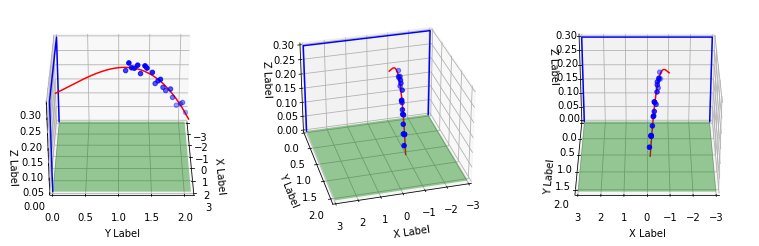

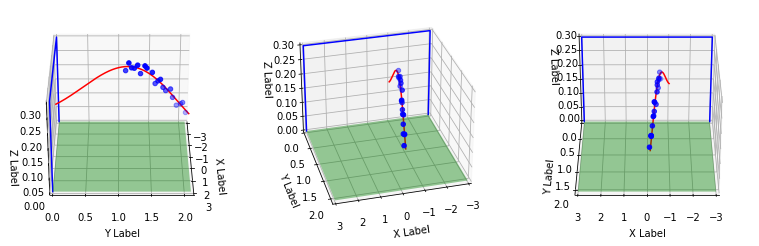

In [17]:
# regressão polinomial para kick2, variando o grau de complexidade para z
print("------------------------------grau_z = 3 e grau_x = 1-----------------------------------")
res_5 = polynomial_regression(kick=kick2,n_x=1, n_z=3,alfa=0.001,n_epoca=100000)
print("------------------------------grau_z = 5 e grau_x = 1-----------------------------------")
res_6 = polynomial_regression(kick=kick2,n_x=1, n_z=5,alfa=0.001,n_epoca=100000)
# Como resultado, as curvas projetadas se assemelham a parábolas mesmo com um grau de complexidade maior, dentro do intervalo de valores de y.
# No entanto, para o grau 5 projetado, podemos notar uma 

------------------------------grau_x = 2 e grau_z = 2-----------------------------------
x = -0.54 + -0.28*y^1 + 0.24*y^2
z = 0.23 + 0.17*y^1 + -0.10*y^2
------------------------------grau_x = 4 e grau_z = 2-----------------------------------
x = -0.52 + -0.28*y^1 + 0.03*y^2 + 0.25*y^3 + -0.07*y^4
z = 0.23 + 0.17*y^1 + -0.10*y^2


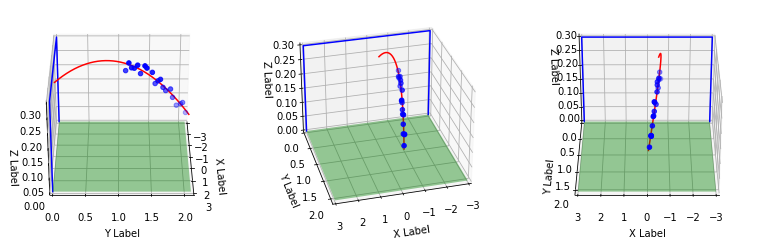

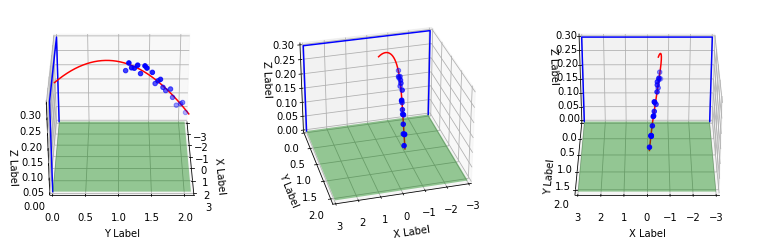

In [18]:
# regressão polinomial para kick2, variando o grau de complexidade para x
print("------------------------------grau_x = 2 e grau_z = 2-----------------------------------")
res_7 = polynomial_regression(kick=kick2,n_x=2, n_z=2,alfa=0.001,n_epoca=100000)
print("------------------------------grau_x = 4 e grau_z = 2-----------------------------------")
res_8 = polynomial_regression(kick=kick2,n_x=4, n_z=2,alfa=0.001,n_epoca=100000)
# Como resultado, vemos uma curva sobre o eixo x. Ela é bem sutil, mesmo para os diferentes valores de grau da equação.

## Avaliação e Resultados


### Avaliação do impacto do grau de complexidade no resultado
Analisando as projeções dos diferentes modelos, vemos que variar a complexidade nas equações das variáveis sobre x e z sobre os dados do kick1, uma curva direcionada para cima surge e com o aumento desse grau de complexidade, ela acaba se tornando uma curva mais acentuada. Agora comparando esse comportamento com um cenário real, esse comportamento de um polinômio não se encaixa.

Já sobre o kick2, o impacto do grau de complexidade não é tão significativo sobre o eixo z. Podemos ver que o comportamente acaba convergindo para um formato semelhante a uma parábolo, dentro do intervalo de valores de y do nosso problema. Quando comparado a realidade e a veracidade da trajétoria de uma bola, seu comportamento é condizente e acaba se assemelhando a uma parábola (uma equação quadrática). Logo podemos considerar os modelos que considerem a trajetória em z como uma equação quadrática sobre y, mais adequados ao problema. 
Agora analisando o impacto do grau de complexidade não é visualmente notória em x. Quando aumentamos o grau da equação de x, mas podemos ver que surge uma curva na trajetória em x. Quando comparamos com a realidade, a trajétoria em x pode apresentar curvas, devido a rotação da bola. Por conta de praticidade, podemos considerar ela como uma equação linear.

### Avaliação do impacto da taxa de aprendizado
Analisando dentro do método do gradiente descendente, a taxa de aprendizado apresenta um impacto muito grande no código e nesse sistema de calcular a regressão linear. Na maioria dos casos, esse valor é bem pequeno, pois dentro do gradiente descendente no calculo dos coeficientes, quando esse alfa é grande ocorre erros de overflow, ou seja, podemos considerar que acabam divergindo. Outra coisa que foi notado, é que para polinômio com grau de complexidade mais altos, a taxa de aprendizado acaba sendo menor para evitar esse mesmo erro de overflow.

### Avaliação: Como e se normalização pode afetar seus resultados
Durante a execução, não nos preocupamos em normalizar os dados pensando em preservar as métricas definidas pelo projeto. Mas avaliando se há uma necessidade para isso, chegamos a conclusão que não é necessário. Isso porque o gradiente descendente utiliza os dados de referência e os dados da nossa hipótese, se eles são valores menores (como no eixo z), os coeficientes serão consequente menores, mesmo com um valor de alfa maior. Para os valores maiores (como no eixo x), os coeficientes da equação serão maiores. Logo esse método de regressão linear/ polinomial por utilizarem comparações de eixos separados (de x para x e z para z), não vemos necessidade para normalizá-los por não afetarem o cálculo tanto do gradiente como da regressão, e também a fim de manter as métricas dos dados fornecidos.

### Avaliação: A qualidade dos resultados
Como podemos ver abaixo, os dataset são bem pequenos. Isso mostra que a regressão linear/polinomial possui poucos exemplos de treinamento (sendo que nessa tarefa, não temos exemplos para testes). Por isso a qualidade dos resultados acaba sendo subjetiva, passando a ser uma análise visual da trajetória prevista e os pontos fornecidos. Além disso, com um conhecimento de física, podemos identificar quais dos modelos que geramos se assemelham mais com a realidade. No entanto, não podemos garantir sem alguns datasets de teste se os modelos acabam sendo especializados demais para o conjunto de treinamento fornecido.

### Avaliação e Resultado: As vantagens e desvantagens de cada método
Nessa tarefa, as vantagens e desvantagens são óbvias. 
- A regressão polinomial é adequada para modelos que envolvam equações de grau maior que 1 e que possuam uma complexidade maior. Sua desvantagem é que o tempo de processamento acaba sendo maior devido a necessidade de fazer mais somas, multiplicações e exponenciações que a linear. Além disso, ela não se encaixa com situações onde a relação entre features são mais simples/lineares.

Exemplo 1: Como resultado do nosso projeto, podemos ver que o kick2 se adequa melhor a uma regressão polinomial, de uma equação de segundo grau mais especificamente.

Exemplo 2: No entanto, para o kick1, ela apresentou uma curva para cima, o que não possui uma lógica com a realidade.

Exemplo 1
x = -1.13 + 0.49*y^1
z = 0.22 + 0.18*y^1 + -0.11*y^2
Exemplo 2
x = -2.29 + 0.99*y^1
z = 0.17 + -0.08*y^1 + 0.03*y^2


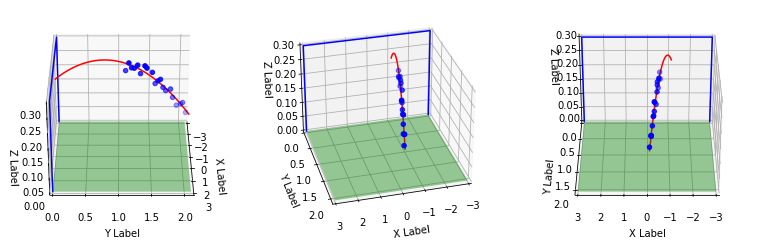

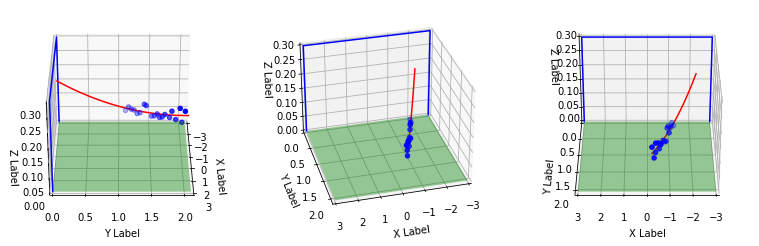

In [20]:
print("Exemplo 1")
ex1 = polynomial_regression(kick=kick2,alfa=0.002,n_epoca=100000)
print("Exemplo 2")
ex2 = polynomial_regression(kick=kick1,n_x=1,n_z=2,alfa=0.02,n_epoca=100000)

- A regressão linear é mais adequada para modelos simples que envolvam uma relação linear entre duas features, além de ser mais fácil de executar os calculos para esses casos. Sua desvantagem é ignorar casos com graus de complexidade maior.

Exemplo 3: a regressão linear se encaixa melhor para o kick1, que se assemelha com um "chute rasteiro" no futebol

Exemplo 4: a regressão linear não foi bem utilizada para o kick2, pois não preve que a bola sofre ação da gravidade e seria uma parábola na realidade.

Exemplo 3
x = -2.29 + 0.99*y^1
z = 0.10 + 0.01*y^1
Exemplo 4
x = -1.14 + 0.49*y^1
z = 0.47 + -0.15*y^1


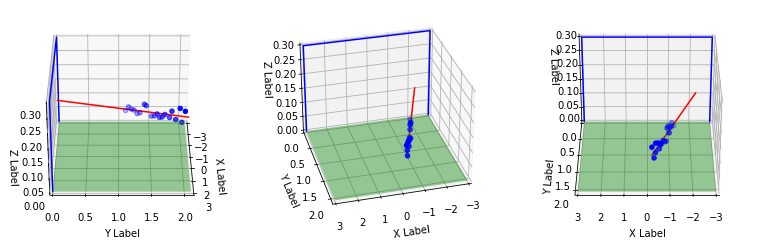

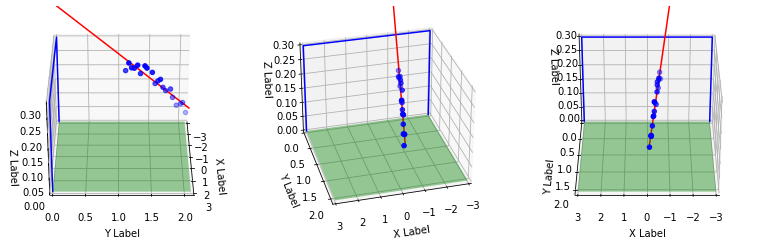

In [21]:
print("Exemplo 3")
ex3 = linear_regression(kick=kick1,alfa=0.1,n_epoca=10000)
print("Exemplo 4")
ex4 = linear_regression(kick=kick2,alfa=0.01,n_epoca=100000)

## Discussão

### O robô seria capaz de defender os chutes?

#### Kick 1
Com os modelos que obtivemos após o treinamento, podemos começar a pensar se o nosso robô goleiro seria capaz de defender os chutes com os dados coletados.
Para o kick1, olhando os modelos gerados a partir desse dataset, como podemos ver abaixo os possíveis cenários que o robô deveria considerar antes de tomar a decisão de onde a bola iria quando estivesse perto do gol.

Como o Robo leva 1/3 segundo para tomar decisão, é preciso pegar somente os dados que são capturados nesse intervalo de tempo. Ou seja, como são capturados 60 frames/segundo, somente 20 exemplos podem ser utilizados.

In [28]:
kick_decision = kick1[:20,:]

60

x = -2.29 + 0.99*y^1
z = 0.10 + 0.01*y^1


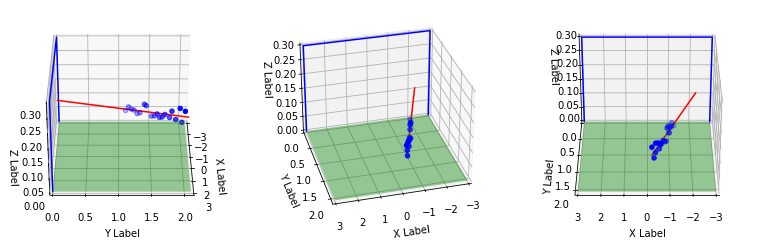

In [29]:
# Considerar um chute com trajetoria reta
def1 = linear_regression(kick=kick_decision,alfa=0.1,n_epoca=10000)

x = -2.29 + 0.99*y^1
z = 0.14 + -0.04*y^1 + 0.01*y^2
x = -2.29 + 0.99*y^1
z = 0.13 + 0.04*y^1 + -0.07*y^2 + 0.03*y^3


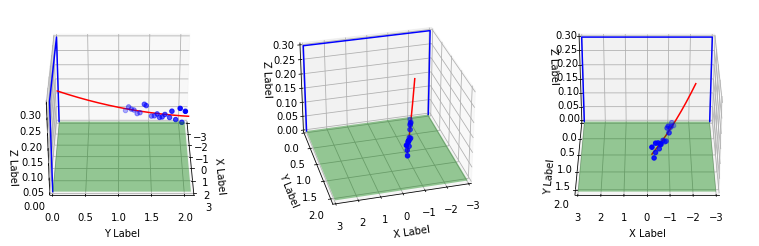

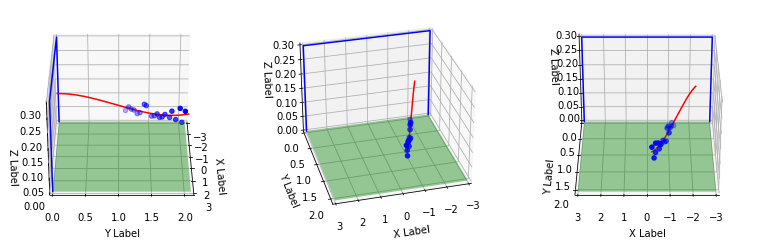

In [30]:
# Considerar um chute com trajetória de parabola em z
def2 = polynomial_regression(kick=kick_decision,n_x=1,n_z=2,alfa=0.01,n_epoca=100000)
def3 = polynomial_regression(kick=kick_decision,n_x=1,n_z=3,alfa=0.01,n_epoca=100000)

Verificando esses casos, tanto a trajetória com equação linear como a polinomial, podemos ver que a coordenada do centro da bola no gol é bem próximo ao ponto (-2,29 ; 0 ; 0,10). Logo considero que o robô tem uma alta chance de conseguir defender o gol. :)

#### Kick 2
Para o kick2, considerando os possíveis cenários:

In [31]:
kick_decision2 = kick2[:20,:]

x = -1.14 + 0.49*y^1
z = 0.47 + -0.15*y^1


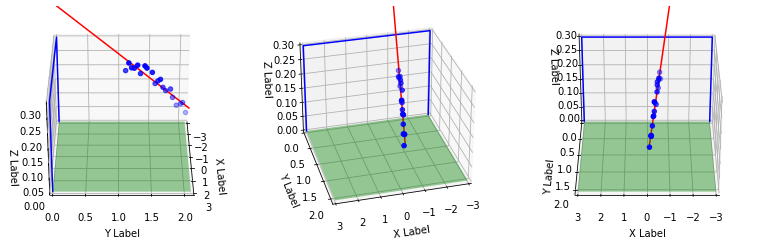

In [32]:
# Considerar um chute com trajetoria reta
def4 = linear_regression(kick=kick_decision2,alfa=0.1,n_epoca=10000)

x = -1.14 + 0.49*y^1
z = 0.16 + 0.26*y^1 + -0.13*y^2
x = -1.14 + 0.49*y^1
z = 0.20 + 0.13*y^1 + -0.02*y^2 + -0.03*y^3


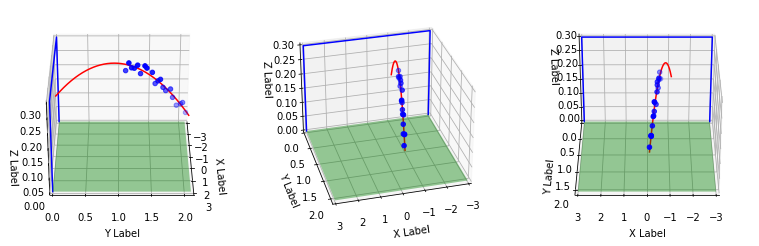

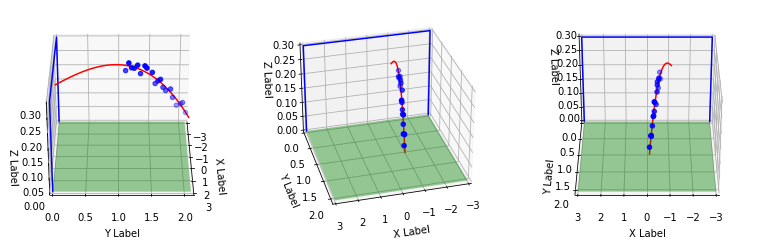

In [33]:
# Considerar um chute com trajetória de parabola em z
def5 = polynomial_regression(kick=kick_decision2,n_x=1,n_z=2,alfa=0.01,n_epoca=100000)
def6 = polynomial_regression(kick=kick_decision2,n_x=1,n_z=3,alfa=0.01,n_epoca=100000)

Na primeira, com a trajetória reta, podemos ver que a bola irá para cima. Na segunda e na terceira, o ponto no qual a bola chega ao gol é semelhante, em torno do ponto (-1,14; 0; 0,16). Logo podemos considerar que caso a bola não siga a trajetória da reta, o robô tem conhecimento do ponto onde a bola chega ao gol e por isso pode defendê-lo.